In [287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json, ast
import plotly.express as px

sns.set()

In [288]:
import ipywidgets as widgets
from IPython.display import display
from IPython.display import Image

In [289]:
import plotly
import plotly.express as px
print(plotly.__version__)

5.3.1


In [290]:
from matplotlib.colors import LogNorm, Normalize

# Research Questions

1. What are the factors facilitating the high tree density in the Allegheny Center, Friendship, and Allegheny West neighborhoods?


2. We see that there exists a clear correlation between the tree density and the overall benefits, however is this reflective of the reality? For example, given that Allegheny Center has the highest tree density where does it rank amongst the overall Air Quality Index score compared to the other neighborhoods?


3. Is there a correlation between the height of a tree species and its benefits? If yes, what is the type of correlation? Does the data imply whether neighborhood with tall trees are benefitted more or benefitted less compared to neighborhood with short trees? Can we derive insights from this data on whether planting tree species that are tall provide more benefits to the neighborhood or not, so that it will be useful for lanscaping and planning?


4. Why are there such big differences in the benefits provided across different neighborhoods for the same tree species? What factors could be contributing to this? 


5. On the other hand, is this difference correlated to some of the neighborhoods that are at a disadvantage? If so, how much? In other words, is tree-inequality correlated to things like lower incomes or lower levels of educational attainment? Is tree equality across neighborhoods something that urban planners and policymakers should focus on? 


6. Is there a correlation between the tree density and the wellbeing of individuals in a neighborhood?


7. Can we use different neighborhood features (including income, education, industrialization, population density, and many more) to predict the tree density in a given neighborhood?

# Exploratory Data Analysis

## Neighborhood Level Tree Density Data

In [291]:
combined_data = pd.read_csv("cleaned_data/tree_density_data.csv")
tree_density_map = combined_data[['neighborhood', 'tree_count']].copy()

In [292]:
combined_data.columns

Index(['Unnamed: 0', 'neighborhood', 'tree_count',
       'stormwater_benefits_dollar_value',
       'property_value_benefits_dollarvalue',
       'energy_benefits_electricity_dollar_value',
       'energy_benefits_gas_dollar_value',
       'air_quality_benfits_total_dollar_value', 'co2_benefits_dollar_value',
       'overall_benefits_dollar_value', 'Neighborhood_2010_AREA',
       'Neighborhood_2010_ACRES'],
      dtype='object')

<AxesSubplot:>

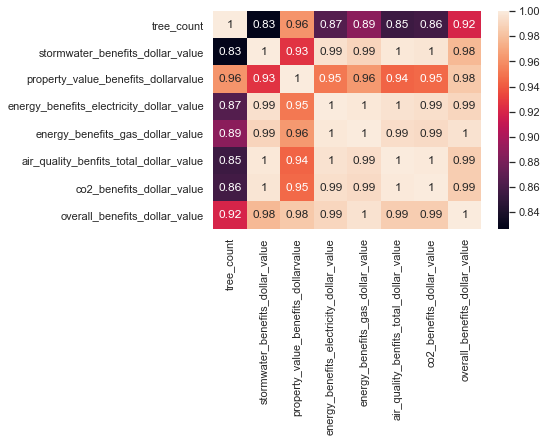

In [293]:
# plot heatmap to observe correlationship between tree benefits
info = combined_data.drop(labels = ['Unnamed: 0', 'Neighborhood_2010_AREA', 'Neighborhood_2010_ACRES'], axis = 1)
corrMatrix = info.corr()
sns.heatmap(corrMatrix, annot=True)

In [294]:
fig=px.choropleth(tree_density_map,
             geojson="https://raw.githubusercontent.com/blackmad/neighborhoods/master/gn-pittsburgh.geojson",
             featureidkey='properties.name',   
             locations='neighborhood',        #column in dataframe
             color='tree_count',
              color_continuous_scale='greens',
               title='Average Tree Density (trees per acre) across Neighborhoods' ,  
               height=500
              )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

**Top 5 neighborhoods with Highest Tree Density**

In [295]:
tree_density_map.sort_values('tree_count', ascending=False).head(5)

,neighborhood,tree_count
0,Allegheny Center,6.406687
33,Friendship,5.183244
1,Allegheny West,4.227166
18,Central Northside,3.898483
39,Highland Park,3.861221


### Neighborhood Level Overall Tree Benefits Data

In [296]:
overall_benefit_map = combined_data[['neighborhood', 'overall_benefits_dollar_value']].copy()

In [297]:
fig=px.choropleth(overall_benefit_map,
             geojson="https://raw.githubusercontent.com/blackmad/neighborhoods/master/gn-pittsburgh.geojson",
             featureidkey='properties.name',   
             locations='neighborhood',        #column in dataframe
             color='overall_benefits_dollar_value',
              color_continuous_scale='greens',
               title='Average Overall benefit across Neighborhoods' ,  
               height=500
              )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

**Top 5 neighborhoods with highest overall benefits**

In [298]:
overall_benefit_map.sort_values('overall_benefits_dollar_value', ascending=False).head(5)

,neighborhood,overall_benefits_dollar_value
0,Allegheny Center,1098.066189
1,Allegheny West,603.947056
39,Highland Park,544.767046
65,Regent Square,477.596975
76,Squirrel Hill South,407.285619


**Inference:
3 of the top 5 neighborhoods with the highest overall benefits are also in the top 5 neighborhoods with highest tree density. This exhibhits a clear positive correlation between the two**

### Neighborhood Level Tree Stormwater Benefits Data

In [299]:
stormwater_benefit_map = combined_data[['neighborhood', 'stormwater_benefits_dollar_value']].copy()

In [300]:
fig=px.choropleth(stormwater_benefit_map,
             geojson="https://raw.githubusercontent.com/blackmad/neighborhoods/master/gn-pittsburgh.geojson",
             featureidkey='properties.name',   
             locations='neighborhood',        #column in dataframe
             color='stormwater_benefits_dollar_value',
              color_continuous_scale='greens',
               title='Average Stormwater benefit across Neighborhoods' ,  
               height=500
              )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

**Top 5 neighborhoods with highest stormwater benefits**

In [301]:
stormwater_benefit_map.sort_values('stormwater_benefits_dollar_value', ascending=False).head(5)

,neighborhood,stormwater_benefits_dollar_value
0,Allegheny Center,112.681320
1,Allegheny West,59.060754
39,Highland Park,52.148217
65,Regent Square,45.628699
75,Squirrel Hill North,42.471383


**Inference:
3 of the top 5 neighborhoods with the highest stormwater benefits are also in the top 5 neighborhoods with highest tree density. This exhibhits a clear positive correlation between the two**

### Neighborhood Level Tree Property Value Benefits Data

In [302]:
property_value_benefit_map = combined_data[['neighborhood', 'property_value_benefits_dollarvalue']].copy()


In [303]:
fig=px.choropleth(property_value_benefit_map,
             geojson="https://raw.githubusercontent.com/blackmad/neighborhoods/master/gn-pittsburgh.geojson",
             featureidkey='properties.name',   
             locations='neighborhood',        #column in dataframe
             color='property_value_benefits_dollarvalue',
              color_continuous_scale='greens',
               title='Average Property Value benefit across Neighborhoods' ,  
               height=500
              )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

**Top 5 neighborhoods with highest property value benefits**

In [304]:
property_value_benefit_map.sort_values('property_value_benefits_dollarvalue', ascending=False).head(5)

,neighborhood,property_value_benefits_dollarvalue
0,Allegheny Center,430.303156
1,Allegheny West,252.741943
39,Highland Park,217.631740
65,Regent Square,188.761117
33,Friendship,182.771638


**Inference:
4 of the top 5 neighborhoods with the highest property value benefits are also in the top 5 neighborhoods with highest tree density. This exhibhits a clear positive correlation between the two**

### Neighborhood Level Tree Energy (Electricity) Benefits Data

In [305]:
energy_electricity_benefit_map = combined_data[['neighborhood', 'energy_benefits_electricity_dollar_value']].copy()


In [306]:
fig=px.choropleth(energy_electricity_benefit_map,
             geojson="https://raw.githubusercontent.com/blackmad/neighborhoods/master/gn-pittsburgh.geojson",
             featureidkey='properties.name',   
             locations='neighborhood',        #column in dataframe
             color='energy_benefits_electricity_dollar_value',
              color_continuous_scale='greens',
               title='Average Energy Electricity benefit across Neighborhoods' ,  
               height=500
              )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

**Top 5 neighborhoods with highest energy (electricity) benefits**

In [307]:
energy_electricity_benefit_map.sort_values('energy_benefits_electricity_dollar_value', ascending=False).head(5)

,neighborhood,energy_benefits_electricity_dollar_value
0,Allegheny Center,105.368577
1,Allegheny West,55.284105
39,Highland Park,52.100405
65,Regent Square,45.653537
75,Squirrel Hill North,39.547891


**Inference:
3 of the top 5 neighborhoods with the highest energy (electricity) benefits are also in the top 5 neighborhoods with highest tree density. This exhibhits a clear positive correlation between the two**

### Neighborhood Level Tree Energy (Gas) Benefits Data

In [308]:
energy_gas_benefit_map = combined_data[['neighborhood', 'energy_benefits_gas_dollar_value']].copy()


In [309]:
fig=px.choropleth(energy_gas_benefit_map,
             geojson="https://raw.githubusercontent.com/blackmad/neighborhoods/master/gn-pittsburgh.geojson",
             featureidkey='properties.name',   
             locations='neighborhood',        #column in dataframe
             color='energy_benefits_gas_dollar_value',
              color_continuous_scale='greens',
               title='Average Energy Gas benefit across Neighborhoods' ,  
               height=500
              )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

**Top 5 neighborhoods with highest energy (gas) benefits**

In [310]:
energy_gas_benefit_map.sort_values('energy_benefits_gas_dollar_value', ascending=False).head(5)

,neighborhood,energy_benefits_gas_dollar_value
0,Allegheny Center,359.936222
1,Allegheny West,190.093803
39,Highland Park,180.978794
65,Regent Square,161.498688
46,Lincoln-Lemington-Belmar,137.901237


**Inference:
3 of the top 5 neighborhoods with the highest energy (gas) benefits are also in the top 5 neighborhoods with highest tree density. This exhibhits a clear positive correlation between the two**

### Neighborhood Level Tree CO2 Benefits Data

In [311]:
co2_benefit_map = combined_data[['neighborhood', 'co2_benefits_dollar_value']].copy()


In [312]:
fig=px.choropleth(co2_benefit_map,
             geojson="https://raw.githubusercontent.com/blackmad/neighborhoods/master/gn-pittsburgh.geojson",
             featureidkey='properties.name',   
             locations='neighborhood',        #column in dataframe
             color='co2_benefits_dollar_value',
              color_continuous_scale='greens',
               title='Average CO2 benefit across Neighborhoods' ,  
               height=500
              )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

**Top 5 neighborhoods with highest CO2 benefit**

In [313]:
co2_benefit_map.sort_values('co2_benefits_dollar_value', ascending=False).head(5)

,neighborhood,co2_benefits_dollar_value
0,Allegheny Center,10.172134
1,Allegheny West,5.328917
39,Highland Park,4.885688
65,Regent Square,4.091595
75,Squirrel Hill North,3.799725


**Inference:
3 of the top 5 neighborhoods with the highest CO2 benefits are also in the top 5 neighborhoods with highest tree density. This exhibhits a clear positive correlation between the two**

### Neighborhood Level Tree Air Quality Benefits Data

In [314]:
air_quality_benefit_map = combined_data[['neighborhood', 'air_quality_benfits_total_dollar_value']].copy()

In [315]:
fig=px.choropleth(air_quality_benefit_map,
             geojson="https://raw.githubusercontent.com/blackmad/neighborhoods/master/gn-pittsburgh.geojson",
             featureidkey='properties.name',   
             locations='neighborhood',        #column in dataframe
             color='air_quality_benfits_total_dollar_value',
              color_continuous_scale='greens',
               title='Average Air Quality benefit across Neighborhoods' ,  
               height=500
              )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

**Top 5 neighborhoods with highest Air quality benefit**

In [316]:
air_quality_benefit_map.sort_values('air_quality_benfits_total_dollar_value', ascending=False).head(5)

,neighborhood,air_quality_benfits_total_dollar_value
0,Allegheny Center,79.604781
1,Allegheny West,41.437534
39,Highland Park,37.170109
65,Regent Square,31.963339
75,Squirrel Hill North,29.528304


**Inference:
3 of the top 5 neighborhoods with the highest air quality benefits are also in the top 5 neighborhoods with highest tree density. This exhibhits a clear positive correlation between the two**

## Tree Characteristics

In [317]:
df_trees = pd.read_csv("cleaned_data/cleaned_tree_data_5.csv", encoding="ISO-8859-1", low_memory=False)

### Average tree height by species

In [318]:
#Average height of tree species in increasing order
df_height_spec = df_trees.groupby("common_name")["height"].mean()
df_height_spec = df_height_spec.to_frame().reset_index()
df_height_spec.columns = ['common_name', 'average_height']
df_height_spec = df_height_spec.sort_values(by=['average_height'], ascending = False)
#Top 10 tallest trees species (average height) across pittsburgh
df_height_spec.head(10)

,common_name,average_height
40,Cottonwood: Eastern,52.800000
25,Butternut,45.833333
103,London planetree,43.155996
142,Oak: Pin,42.351203
81,Hickory: Bitternut,41.632653
178,Poplar: White,40.000000
222,Willow: Black,39.600000
122,Maple: Silver,38.936686
102,Locust: Black,38.511367
208,Sycamore: American,37.615631


In [319]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

df_height_spec

,common_name,average_height
40,Cottonwood: Eastern,52.800000
25,Butternut,45.833333
103,London planetree,43.155996
142,Oak: Pin,42.351203
81,Hickory: Bitternut,41.632653
178,Poplar: White,40.000000
222,Willow: Black,39.600000
122,Maple: Silver,38.936686
102,Locust: Black,38.511367
208,Sycamore: American,37.615631


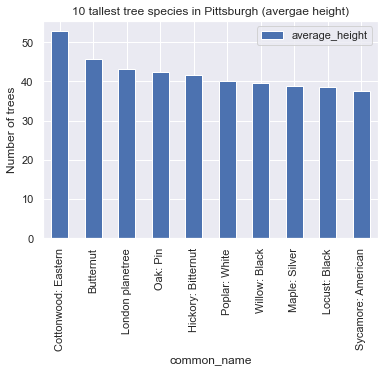

In [320]:
df_tallest_10 = df_height_spec.head(10)
ax = df_tallest_10.plot.bar(x='common_name', y='average_height', rot='vertical', ylabel = 'Number of trees', title= "10 tallest tree species in Pittsburgh (avergae height)")

### Average Tree Height across Neighborhoods

Top 10 neighborhoods with the highest average tree height

In [321]:
df_height = df_trees.groupby("neighborhood")["height"].mean()
df_height = df_height.to_frame().reset_index()
df_height.columns = ['neighborhood', 'average_height']
df_height1 = df_height.sort_values(by=['average_height'], ascending = False)
df_height1.head(10)

,neighborhood,average_height
37,Hays,45.000000
31,Fairywood,42.964286
4,Arlington Heights,42.748561
77,St. Clair,38.500000
20,Chartiers City,36.318221
57,Northview Heights,35.333333
32,Fineview,34.524743
75,Squirrel Hill North,33.534065
46,Lincoln-Lemington-Belmar,33.336483
27,East Hills,33.173275


#### Choropleth map for average tree height across the neighborhoods of Pittsburgh

In [322]:
fig=px.choropleth(df_height,
             geojson="https://raw.githubusercontent.com/blackmad/neighborhoods/master/gn-pittsburgh.geojson",
             featureidkey='properties.name',   
             locations='neighborhood',        #column in dataframe
             color='average_height',
              color_continuous_scale='blues',
               title='Average Tree Height across Neighborhood' ,  
               height=700
              )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()
#img_bytes = fig.to_image(format="png")
#Image(img_bytes)

### Average tree width by species

In [323]:
#Average height of tree species in increasing order
df_width_spec = df_trees.groupby("common_name")["width"].mean()
df_width_spec = df_width_spec.to_frame().reset_index()
df_width_spec.columns = ['common_name', 'average_width']
df_width_spec = df_width_spec.sort_values(by=['average_width'], ascending = False)
#Top 10 tallest trees species (average height) across pittsburgh
df_width_spec.head(10)

,common_name,average_width
213,Unknown Shrub,21.750000
173,Plum: American,15.000000
40,Cottonwood: Eastern,14.700000
102,Locust: Black,14.558603
103,London planetree,14.181896
142,Oak: Pin,13.317443
170,Pine: Virginia,12.000000
209,Tree-of-Heaven,11.966595
57,Elm: Slippery,11.727273
29,Cherry: Black,11.589856


In [324]:
df_width_spec

,common_name,average_width
213,Unknown Shrub,21.750000
173,Plum: American,15.000000
40,Cottonwood: Eastern,14.700000
102,Locust: Black,14.558603
103,London planetree,14.181896
142,Oak: Pin,13.317443
170,Pine: Virginia,12.000000
209,Tree-of-Heaven,11.966595
57,Elm: Slippery,11.727273
29,Cherry: Black,11.589856


### Average Tree Width across Neighborhoods

Top 10 neighborhoods with the highest average tree width

In [325]:
df_width = df_trees.groupby("neighborhood")["width"].mean()
df_width = df_width.to_frame().reset_index()
df_width.columns = ['neighborhood', 'average_width']
df_width1 = df_width.sort_values(by=['average_width'], ascending = False)
df_width1.head(10)

,neighborhood,average_width
77,St. Clair,13.454069
32,Fineview,13.243513
4,Arlington Heights,11.448097
75,Squirrel Hill North,10.632508
20,Chartiers City,10.600609
80,Summer Hill,10.392978
16,Central Business District,10.152232
26,East Carnegie,10.027174
57,Northview Heights,9.750436
31,Fairywood,9.698687


In [326]:
df_width

,neighborhood,average_width
0,Allegheny Center,6.741885
1,Allegheny West,7.798702
2,Allentown,7.388842
3,Arlington,5.454705
4,Arlington Heights,11.448097
5,Banksville,8.584796
6,Bedford Dwellings,5.967677
7,Beechview,7.529372
8,Beltzhoover,6.381896
9,Bloomfield,6.789286


### Hays mystery

In [327]:
df_hays = df_trees.loc[df_trees["neighborhood"] == 'Fairywood']


In [328]:
df_hays.head(10)

,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,growth_space_type,diameter_base_height,stems,overhead_utilities,land_use,condition,stormwater_benefits_dollar_value,stormwater_benefits_runoff_elim,property_value_benefits_dollarvalue,property_value_benefits_leaf_surface_area,energy_benefits_electricity_dollar_value,energy_benefits_gas_dollar_value,air_quality_benfits_o3dep_dollar_value,air_quality_benfits_o3dep_lbs,air_quality_benfits_vocavd_dollar_value,air_quality_benfits_vocavd_lbs,air_quality_benfits_no2dep_dollar_value,air_quality_benfits_no2dep_lbs,air_quality_benfits_no2avd_dollar_value,air_quality_benfits_no2avd_lbs,air_quality_benfits_so2dep_dollar_value,air_quality_benfits_so2dep_lbs,air_quality_benfits_so2avd_dollar_value,air_quality_benfits_so2avd_lbs,air_quality_benfits_pm10depdollar_value,air_quality_benfits_pm10dep_lbs,air_quality_benfits_pm10avd_dollar_value,air_quality_benfits_pm10avd_lbs,air_quality_benfits_total_dollar_value,air_quality_benfits_total_lbs,co2_benefits_dollar_value,co2_benefits_sequestered_lbs,co2_benefits_sequestered_value,co2_benefits_avoided_lbs,co2_benefits_avoided_value,co2_benefits_decomp_lbs,co2_benefits_maint_lbs,co2_benefits_totalco2_lbs,overall_benefits_dollar_value,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
3176,442443741,2401,WOODMERE DR,Oak: Pin,Quercus palustris,45.0,12.0,99.0,99.0,Open or Unrestricted,30.0,1.0,No,Residential,Fair,33.121148,4140.143463,108.214780,179.850868,28.583526,89.500338,5.107683,1.112785,0.115394,0.049954,2.205768,0.480560,6.132734,1.336108,0.646404,0.185748,2.547975,0.732177,4.894282,0.588963,0.755981,0.090972,22.406221,4.577267,3.612733,674.417520,4.955620,502.843850,3.694897,-76.911081,-18.693813,1081.656476,285.438745,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.441794,-80.081155
3177,1277708693,2401,WOODMERE DR,Oak: Pin,Quercus palustris,45.0,12.0,99.0,99.0,Open or Unrestricted,21.0,1.0,No,Residential,Good,21.069163,2633.645393,85.742954,142.503129,18.232633,63.686359,3.408396,0.742570,0.090808,0.039311,1.471926,0.320681,4.739943,1.032667,0.431350,0.123951,1.883858,0.541339,3.110694,0.374331,0.559894,0.067376,15.696870,3.242226,2.147038,461.581219,3.391699,371.600656,2.730522,-175.195753,-15.160226,642.825896,206.575018,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.441183,-80.080572
5368,1530642530,512,W PROSPECT AVE,Elm: American,Ulmus americana,18.0,12.0,99.0,99.0,Open or Unrestricted,7.0,1.0,No,Residential,Fair,4.462420,557.802528,70.703593,117.508001,4.663725,20.135218,0.589417,0.128413,0.022833,0.009884,0.238844,0.052036,1.151095,0.250783,0.068557,0.019700,0.416389,0.119652,0.537673,0.064702,0.144468,0.017385,3.169277,0.662556,0.464210,70.320938,0.516718,82.044649,0.602864,-9.018800,-4.361890,138.984897,103.598442,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.447876,-80.081803
5369,411408078,2410,WOODMERE DR,Oak: Pin,Quercus palustris,35.0,8.0,99.0,8.0,Open or Restricted,27.0,1.0,No,Residential,Fair,28.013456,3501.682016,100.724171,167.401622,25.166718,81.999227,4.331201,0.943617,0.103915,0.044985,1.870442,0.407504,5.486610,1.195340,0.548136,0.157510,2.243777,0.644763,4.150241,0.499427,0.677821,0.081567,19.412143,3.974713,3.151145,575.455683,4.228448,442.735061,3.253217,-57.909869,-16.824432,943.456442,258.466859,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.442345,-80.081928
5370,508551178,2411,WOODMERE DR,Oak: Pin,Quercus palustris,55.0,15.0,99.0,99.0,Open or Unrestricted,26.0,1.0,No,Residential,Good,29.271027,3658.878385,98.227302,163.251873,24.011037,78.947082,4.749612,1.034774,0.115459,0.049982,2.051134,0.446870,6.087023,1.326149,0.601088,0.172726,2.480224,0.712708,4.334763,0.521632,0.716599,0.086233,21.135902,4.351075,3.400103,632.502255,4.647627,489.370747,3.595896,-85.108211,-18.769804,1017.994987,254.992452,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.442064,-80.081427
5882

#### Choropleth map for average tree width across the neighborhoods of Pittsburgh

In [329]:
fig=px.choropleth(df_width,
             geojson="https://raw.githubusercontent.com/blackmad/neighborhoods/master/gn-pittsburgh.geojson",
             featureidkey='properties.name',   
             locations='neighborhood',        #column in dataframe
             color='average_width',
              color_continuous_scale='blues',
               title='Average Tree Width across Neighborhood' ,  
               height=700
              )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()
#img_bytes = fig.to_image(format="png")
#Image(img_bytes)

**Inference** : 7 of the top 10 neighborhoods with the highest average tree height are also present in the top 10 neighborhoods with the highest average tree width. While there seems to be positive correlation between the average height and average width (tall trees tend to have more width), this can't be considered as a strong correlation. A strange observation is that the neighborhood 'Hays' has the highest average tree height in pittsburgh. However, it has one of the lowest average tree width in Pittsburgh!

### The most prevalent species in each neighborhood

In [330]:
groupBySpeciesAndNeighborhood = df_trees.groupby(['neighborhood','common_name'])['id'].count()
groupBySpeciesAndNeighborhood = groupBySpeciesAndNeighborhood.to_frame().reset_index()
prevalent_species = groupBySpeciesAndNeighborhood.loc[groupBySpeciesAndNeighborhood.groupby(['neighborhood'])['id'].idxmax()].reset_index(drop=True)
prevalent_species

,neighborhood,common_name,id
0,Allegheny Center,London planetree,109
1,Allegheny West,Pear: Callery,44
2,Allentown,Pear: Callery,14
3,Arlington,Hemlock: Eastern,14
4,Arlington Heights,Locust: Black,2
5,Banksville,Sweetgum: American,55
6,Bedford Dwellings,Maple: Freeman,66
7,Beechview,Maple: Norway,92
8,Beltzhoover,Linden: Littleleaf,24
9,Bloomfield,Pear: Callery,170


#### Choropleth map showing the tree species that is the highest in number in each neighborhood

In [331]:
fig=px.choropleth(prevalent_species,
             geojson="https://raw.githubusercontent.com/blackmad/neighborhoods/master/gn-pittsburgh.geojson",
             featureidkey='properties.name',   
             locations='neighborhood',        #column in dataframe
             color='common_name',
              color_continuous_scale='Inferno',
               title='Most prevalent species in each Neighborhood' ,  
               height=700
              )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

The top 5 tree species that are the most prevalant in many neighborhoods

In [332]:
overall_prevalent = prevalent_species.groupby(['common_name'])['id'].count()
overall_prevalent = overall_prevalent.to_frame().reset_index()
overall_prevalent = overall_prevalent.sort_values(by=['id'], ascending = False)
overall_prevalent.head(5)

,common_name,id
11,Maple: Norway,18
17,Pear: Callery,12
9,London planetree,10
7,Linden: Littleleaf,9
6,Honeylocust: Thornless,7


**Inference:** It can be seen that Maple:Norway is the most prevalent species in 18 neighborhoods, followed by Pear:Callery which is the most prevalent in 12 neighborhoods and then London planetree which is the most prevalent in 10 neighborhoods and so on.

### Distribution of species across neighborhoods

In [333]:
#Selecting tree species whose count is more than 50
df_trees_thresh = df_trees.groupby(['common_name'])['id'].count()
df_trees_thresh1 = df_trees_thresh.to_frame().reset_index()
df_trees_thresh1 = df_trees_thresh1.sort_values(by=['id'], ascending = False)
df_trees_thresh1 = df_trees_thresh1[df_trees_thresh1['id'] > 50]
df_trees_thresh1

,common_name,id
118,Maple: Norway,3717
120,Maple: Red,3421
103,London planetree,3224
156,Pear: Callery,2969
217,Vacant Site Small,2418
99,Linden: Littleleaf,2413
86,Honeylocust: Thornless,2019
142,Oak: Pin,1672
42,Crabapple: Flowering,1293
73,Ginkgo,1206


**Run the following cell and select a species from the dropdown menu and run the following cells to visualize the distribution of the selected species across the neighborhoods of Pittsburgh.**

In [334]:
#Run this cell
#Select a species from the dropdown menu
#Run the following cells
selected_spec = widgets.Dropdown(options = df_trees_thresh1.common_name, value='Maple: Norway', description='Species:')
print("\nSelect a species\n")
display(selected_spec)


Select a species



Dropdown(description='Species:', options=('Maple: Norway', 'Maple: Red', 'London planetree', 'Pear: Callery', …

In [335]:
df_spec = df_trees.groupby(['common_name', 'neighborhood'])['id'].count()
df_spec = df_spec.to_frame().reset_index()
df_spec = df_spec.loc[df_spec['common_name'] == selected_spec.value]
#df_spec['percent'] = ((df_spec['id']/df_spec['id'].sum()) * 100)
df_spec = df_spec.rename(columns={"id": "count"})
df_spec

,common_name,neighborhood,count
1968,Maple: Norway,Allegheny Center,48
1969,Maple: Norway,Allegheny West,21
1970,Maple: Norway,Allentown,9
1971,Maple: Norway,Arlington,9
1972,Maple: Norway,Banksville,39
1973,Maple: Norway,Beechview,92
1974,Maple: Norway,Beltzhoover,21
1975,Maple: Norway,Bloomfield,125
1976,Maple: Norway,Bluff,21
1977,Maple: Norway,Bon Air,26


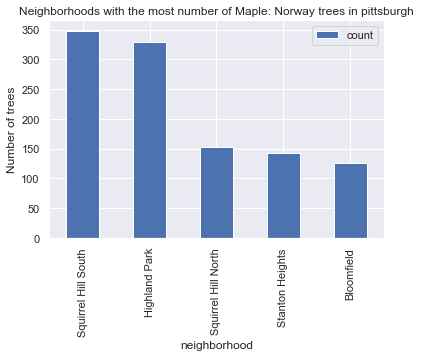

In [336]:
str1 = "Neighborhoods with the most number of " + str(selected_spec.value) + " trees in pittsburgh"
df_spec1 = df_spec.sort_values(by=['count'], ascending = False)
df_spec1 = df_spec1.head(5)
ax = df_spec1.plot.bar(x='neighborhood', y='count', rot='vertical', ylabel = 'Number of trees', title= str1)

In [337]:
full_neigh = pd.DataFrame({'neighborhood' : df_trees['neighborhood'].unique()})
full_neigh = full_neigh.rename(columns={"id": "count"})
full_neigh = full_neigh.merge(df_spec, how = 'outer', on = ['neighborhood'])
full_neigh['count'] = full_neigh['count'].fillna(0)
full_neigh = full_neigh.drop(labels = ['common_name'], axis = 1)
full_neigh.sort_values(['count'], ascending= False)

,neighborhood,count
26,Squirrel Hill South,348.0
4,Highland Park,329.0
42,Squirrel Hill North,153.0
5,Stanton Heights,142.0
28,Brighton Heights,125.0
10,Bloomfield,125.0
18,Shadyside,119.0
58,Perry North,114.0
32,Brookline,106.0
50,Crafton Heights,97.0


#### Choropleth map showing the distribution of the selected species across the neighborhoods of Pittsburgh

In [338]:
str2 = "Distribution of " + str(selected_spec.value) + " across neighborhoods of Pittsburgh"
fig=px.choropleth(full_neigh,
             geojson="https://raw.githubusercontent.com/blackmad/neighborhoods/master/gn-pittsburgh.geojson",
             featureidkey='properties.name',   
             locations='neighborhood',        #column in dataframe
             color='count',
              color_continuous_scale= 'blues',
               title= str2 ,  
               height=700,
              )
fig.update_geos(fitbounds="locations", visible=False)
fig.layout.template = None
fig.show()

## Tree Species Specific Benefits
The dataset being explored is the cleaned "City of Pittsburgh Trees" dataset. We will investigate the benefits (in terms of dollar value) of different tree species and try to identify some patterns. Then, some intra-species investigation will be done, as well as some neighborhood-level explorations.

In [339]:
df_trees = pd.read_csv("cleaned_data/cleaned_tree_data_5.csv", encoding="ISO-8859-1", low_memory=False)
tree_stat = df_trees.groupby(["common_name"]).agg(["count", "mean"]).reset_index()

Only selected trees species with more than 10 datapoints to reduce the effect of outliers. 

In [340]:
tree_stat = tree_stat[tree_stat["id"]["count"] >= 10]
tree_stat.head(2)

common_name    id               height            width            \
                 count          mean  count       mean count      mean   
0  Amur Corktree    45  1.010417e+09     45  17.881481    45  5.013827   
1   Amur Maackia    17  1.158984e+09     17  13.550173    17  7.231834   

  growth_space_length            growth_space_width            \
                count       mean              count      mean   
0                  45  51.330370                 45  5.119012   
1                  17  10.401384                 17  3.176471   

  diameter_base_height            stems            \
                 count       mean count      mean   
0                   45  21.066667    45  1.022222   
1                   17   3.647059    17  1.117647   

  stormwater_benefits_dollar_value            stormwater_benefits_runoff_elim  \
                             count       mean                           count   
0                               45  17.874966                              45   
1                               17   2.043452                              17   

               property_value_benefits_dollarvalue             \
          mean                               count       mean   
0  2234.370713                                  45  43.999139   
1   255.431537                                  17  50.767431   

  property_value_benefits_leaf_surface_area             \
                                      count       mean   
0                                        45  73.125717   
1                                        17  85.896094   

  energy_benefits_electricity_dollar_value             \
                                     count       mean   
0                                       45  17.100700   
1                                       17   1.859724   

  energy_benefits_gas_dollar_value             \
                             count       mean   
0                               45  62.041731   
1                               17   8.127935   

  air_quality_benfits_o3dep_dollar_value            \
                                   count      mean   
0                                     45  2.528595   
1                                     17  0.243165   

  air_quality_benfits_o3dep_lbs            \
                          count      mean   
0                            45  0.550892   
1                            17  0.052977   

  air_quality_benfits_vocavd_dollar_value            \
                                    count      mean   
0                                      45  0.073911   
1                                      17  0.009272   

  air_quality_benfits_vocavd_lbs            \
                           count      mean   
0                             45  0.031996   
1                             17  0.004014   

  air_quality_benfits_no2dep_dollar_value            \
                                    count      mean   
0                                      45  1.091981   
1                                      17  0.105012   

  air_quality_benfits_no2dep_lbs            \
                           count      mean   
0                             45  0.237904   
1                             17  0.022878   

  air_quality_benfits_no2avd_dollar_value            \
                                    count      mean   
0                                      45  3.835396   
1                                      17  0.466649   

  air_quality_benfits_no2avd_lbs            \
                           count      mean   
0                             45  0.835598   
1                             17  0.101666   

  air_quality_benfits_so2dep_dollar_value            \
                                    count      mean   
0                                      45  0.320007   
1                                      17  0.030774   

  air_quality_benfits_so2dep_lbs            \
                           count      mean   
0                             45  0.091956   
1             

Since there are many different tree species, only top 30 will be shown for each benefit category. The common names, instead of the scientific names, of the trees will be used since they are more recognizable. 

#### Top 30 tree species that provide the most stormwater benefits

In [341]:
storm_water_benefit = tree_stat.sort_values([("stormwater_benefits_dollar_value","mean")])
storm_water_benefit = storm_water_benefit.tail(30)

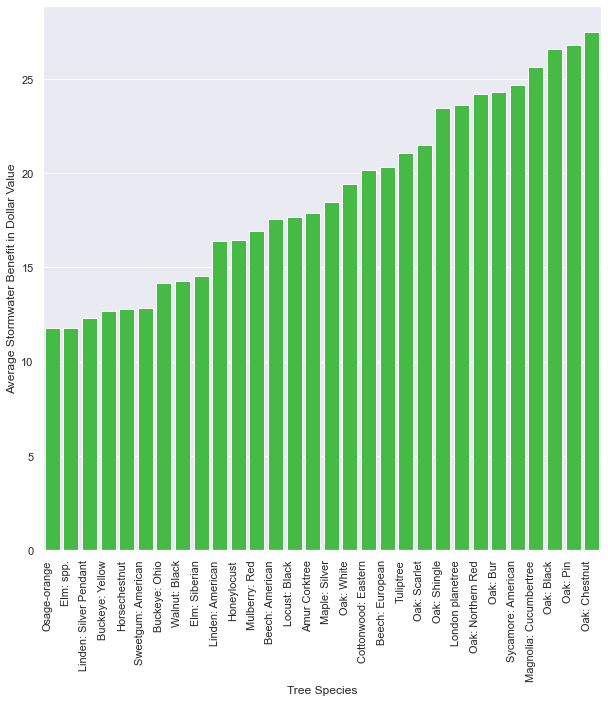

In [342]:
storm_water_bar_plot = sns.barplot(x=storm_water_benefit["common_name"], y=storm_water_benefit["stormwater_benefits_dollar_value"]["mean"],color="limegreen")
storm_water_bar_plot.set_xticklabels(storm_water_bar_plot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
storm_water_bar_plot.set_xlabel("Tree Species", fontsize = 12)
storm_water_bar_plot.set_ylabel("Average Stormwater Benefit in Dollar Value", fontsize = 12)
plt.gcf().set_size_inches(10,10)

Different oak species offered the most benefits. 

#### Top 30 tree species that provide the most property value benefits

In [343]:
property_benefit = tree_stat.sort_values([("property_value_benefits_dollarvalue","mean")])
property_benefit = property_benefit.tail(30)

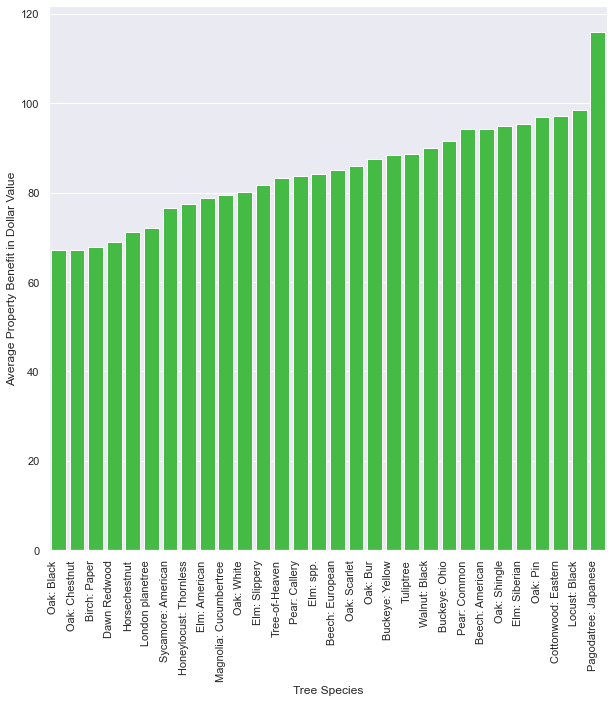

In [344]:
property_benefit_bar_plot = sns.barplot(x=property_benefit["common_name"], y=property_benefit["property_value_benefits_dollarvalue"]["mean"], color="limegreen")
property_benefit_bar_plot.set_xticklabels(property_benefit_bar_plot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
property_benefit_bar_plot.set_xlabel("Tree Species", fontsize = 12)
property_benefit_bar_plot.set_ylabel("Average Property Benefit in Dollar Value", fontsize = 12)
plt.gcf().set_size_inches(10,10)

Japanese Pagodatree and black locust trees provide the most property value benefits. 

#### Top 30 tree species that provide the most electricity saving benefits

In [345]:
energy_benefit_elec = tree_stat.sort_values([("energy_benefits_electricity_dollar_value","mean")])
energy_benefit_elec = energy_benefit_elec.tail(30)

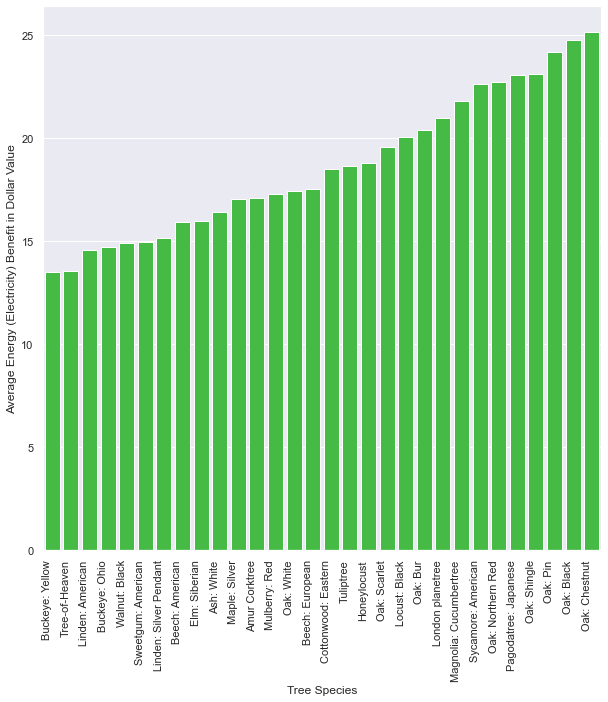

In [346]:
energy_benefit_elec_bar_plot = sns.barplot(x=energy_benefit_elec["common_name"], y=energy_benefit_elec["energy_benefits_electricity_dollar_value"]["mean"], color="limegreen")
energy_benefit_elec_bar_plot.set_xticklabels(energy_benefit_elec_bar_plot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
energy_benefit_elec_bar_plot.set_xlabel("Tree Species", fontsize = 12)
energy_benefit_elec_bar_plot.set_ylabel("Average Energy (Electricity) Benefit in Dollar Value", fontsize = 12)
plt.gcf().set_size_inches(10,10)

#### Top 30 tree species that provide the most gas saving benefits

In [347]:
energy_benefit_gas = tree_stat.sort_values([("energy_benefits_gas_dollar_value","mean")])
energy_benefit_gas = energy_benefit_gas.tail(30)

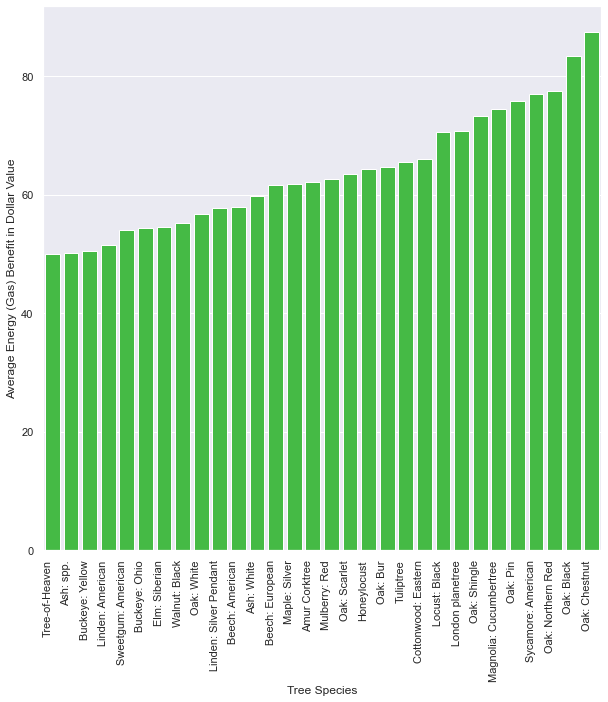

In [348]:
energy_benefit_gas_bar_plot = sns.barplot(x=energy_benefit_gas["common_name"], y=energy_benefit_gas["energy_benefits_gas_dollar_value"]["mean"], color="limegreen")
energy_benefit_gas_bar_plot.set_xticklabels(energy_benefit_gas_bar_plot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
energy_benefit_gas_bar_plot.set_xlabel("Tree Species", fontsize = 12)
energy_benefit_gas_bar_plot.set_ylabel("Average Energy (Gas) Benefit in Dollar Value", fontsize = 12)
plt.gcf().set_size_inches(10,10)

Oak trees provide the most energy-related benefits. 

#### Top 30 tree species that provide the most overall air quality benefits

In [349]:
air_quality_total_benefit = tree_stat.sort_values([("air_quality_benfits_total_dollar_value","mean")])
air_quality_total_benefit = air_quality_total_benefit.tail(30)

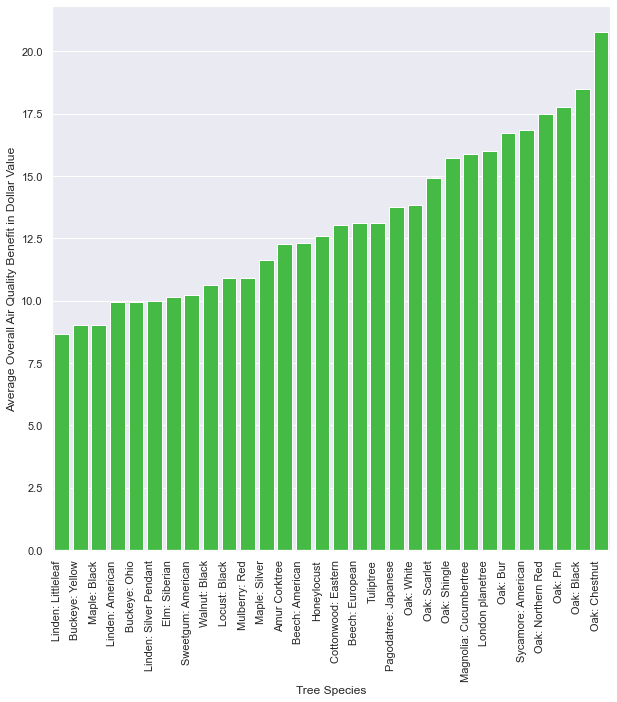

In [350]:
air_quality_total_benefit_bar_plot = sns.barplot(x=air_quality_total_benefit["common_name"], y=air_quality_total_benefit["air_quality_benfits_total_dollar_value"]["mean"], color="limegreen")
air_quality_total_benefit_bar_plot.set_xticklabels(air_quality_total_benefit_bar_plot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
air_quality_total_benefit_bar_plot.set_xlabel("Tree Species", fontsize = 12)
air_quality_total_benefit_bar_plot.set_ylabel("Average Overall Air Quality Benefit in Dollar Value", fontsize = 12)
plt.gcf().set_size_inches(10,10)

There are many pollutants that can impact air quality, and trees provide values by decomposing or absorbing these chemicals. These pollutants include O3 (ozone), SO2(sulfur dioxide), NO2(nitrogen dioxide), and PM10. We can explore which trees provide the most values in terms of reducing these pollutants. 

#### O3 benefits

In [351]:
o3_air_quality_total_benefit = tree_stat.sort_values([("air_quality_benfits_o3dep_dollar_value","mean")])
o3_air_quality_total_benefit = o3_air_quality_total_benefit.tail(30)

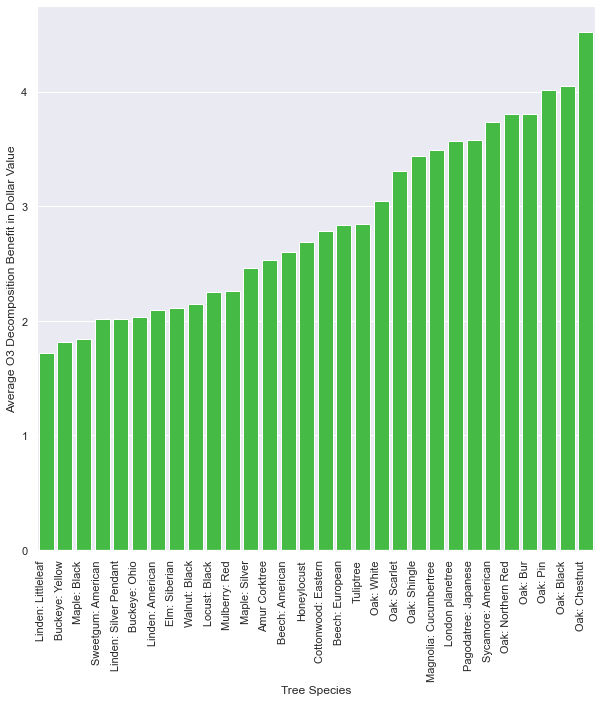

In [352]:
o3_air_quality_total_benefit = sns.barplot(x=o3_air_quality_total_benefit["common_name"], y=o3_air_quality_total_benefit["air_quality_benfits_o3dep_dollar_value"]["mean"], color="limegreen")
o3_air_quality_total_benefit.set_xticklabels(o3_air_quality_total_benefit.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
o3_air_quality_total_benefit.set_xlabel("Tree Species", fontsize = 12)
o3_air_quality_total_benefit.set_ylabel("Average O3 Decomposition Benefit in Dollar Value", fontsize = 12)
plt.gcf().set_size_inches(10,10)

Oak trees absorb the most O3 and offer the most benefit in dollar values. 

#### SO2 Benefits

In [353]:
so2_air_quality_total_benefit = tree_stat.sort_values([("air_quality_benfits_so2dep_dollar_value","mean")])
so2_air_quality_total_benefit = so2_air_quality_total_benefit.tail(30)

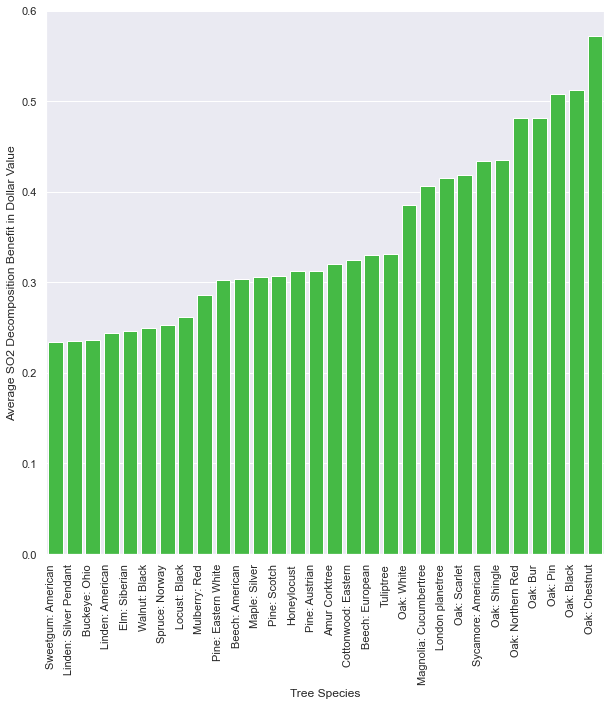

In [354]:
so2_air_quality_total_benefit = sns.barplot(x=so2_air_quality_total_benefit["common_name"], y=so2_air_quality_total_benefit["air_quality_benfits_so2dep_dollar_value"]["mean"], color="limegreen")
so2_air_quality_total_benefit.set_xticklabels(so2_air_quality_total_benefit.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
so2_air_quality_total_benefit.set_xlabel("Tree Species", fontsize = 12)
so2_air_quality_total_benefit.set_ylabel("Average SO2 Decomposition Benefit in Dollar Value", fontsize = 12)
plt.gcf().set_size_inches(10,10)

Oak trees absorb the most SO2 and offer the most benefit in dollar values. 

#### NO2 Benefits

In [355]:
no2_air_quality_total_benefit = tree_stat.sort_values([("air_quality_benfits_no2dep_dollar_value","mean")])
no2_air_quality_total_benefit = no2_air_quality_total_benefit.tail(30)

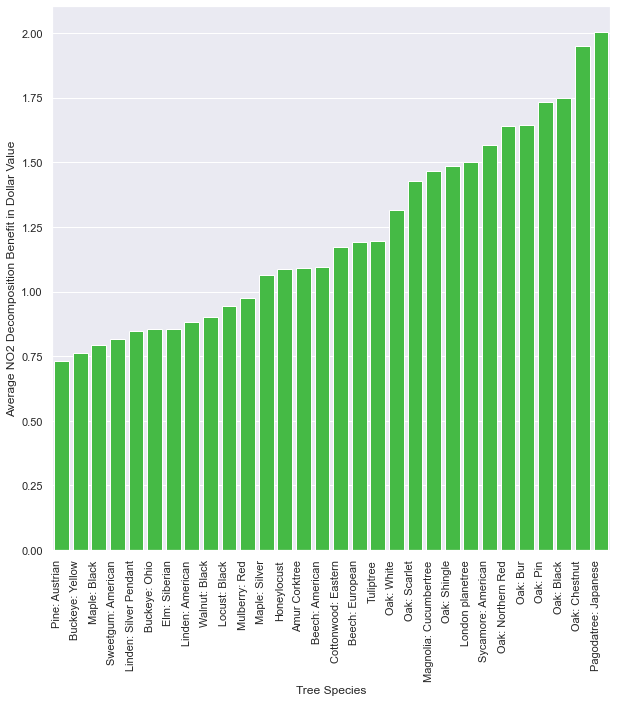

In [356]:
no2_air_quality_total_benefit = sns.barplot(x=no2_air_quality_total_benefit["common_name"], y=no2_air_quality_total_benefit["air_quality_benfits_no2dep_dollar_value"]["mean"], color="limegreen")
no2_air_quality_total_benefit.set_xticklabels(no2_air_quality_total_benefit.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
no2_air_quality_total_benefit.set_xlabel("Tree Species", fontsize = 12)
no2_air_quality_total_benefit.set_ylabel("Average NO2 Decomposition Benefit in Dollar Value", fontsize = 12)
plt.gcf().set_size_inches(10,10)

Surpringly, for NO2, Japanese Pegoda trees absorb and decompose the most and offer the most benefit in dollar values. 

In [357]:
pm10_air_quality_total_benefit = tree_stat.sort_values([("air_quality_benfits_pm10depdollar_value","mean")])
pm10_air_quality_total_benefit = pm10_air_quality_total_benefit.tail(30)

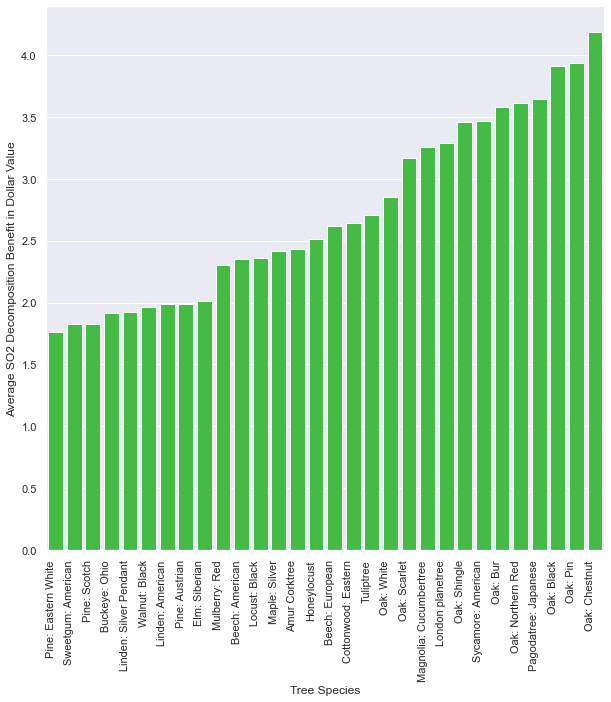

In [358]:
pm10_air_quality_total_benefit = sns.barplot(x=pm10_air_quality_total_benefit["common_name"], y=pm10_air_quality_total_benefit["air_quality_benfits_pm10depdollar_value"]["mean"], color="limegreen")
pm10_air_quality_total_benefit.set_xticklabels(pm10_air_quality_total_benefit.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
pm10_air_quality_total_benefit.set_xlabel("Tree Species", fontsize = 12)
pm10_air_quality_total_benefit.set_ylabel("Average SO2 Decomposition Benefit in Dollar Value", fontsize = 12)
plt.gcf().set_size_inches(10,10)

Once again oak trees provide the most benefits in terms of PM10 reduction.

#### Top 30 tree species that provide the most CO2 related benefits (CO2 sequester, CO2 reduction, etc.)

In [359]:
co2_total_benefit = tree_stat.sort_values([("co2_benefits_dollar_value","mean")])
co2_total_benefit = co2_total_benefit.tail(30)

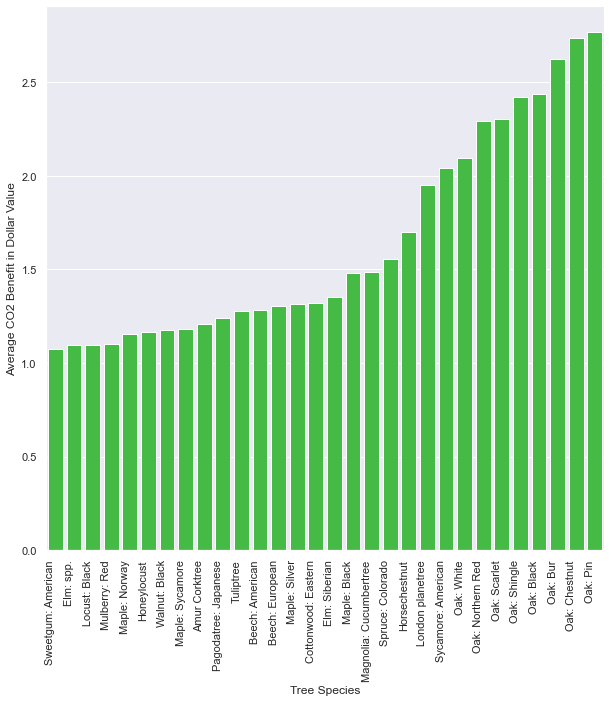

In [360]:
co2_total_benefit_bar_plot = sns.barplot(x=co2_total_benefit["common_name"], y=co2_total_benefit["co2_benefits_dollar_value"]["mean"], color="limegreen")
co2_total_benefit_bar_plot.set_xticklabels(co2_total_benefit_bar_plot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
co2_total_benefit_bar_plot.set_xlabel("Tree Species", fontsize = 12)
co2_total_benefit_bar_plot.set_ylabel("Average CO2 Benefit in Dollar Value", fontsize = 12)
plt.gcf().set_size_inches(10,10)

#### Top 30 tree species that provide overall the most benefits, with top 3 highlighted

In [383]:
overall_total_benefit = tree_stat.sort_values([("overall_benefits_dollar_value","mean")])
overall_total_benefit = overall_total_benefit.tail(100)

In [384]:
overall_total_benefit

common_name    id               height            width  \
                                count          mean  count       mean count   
112                 Maple: Amur   118  1.124664e+09    118  15.500000   118   
31   Cherry: Japanese Flowering   105  1.097981e+09    105  14.133333   105   
75               Goldenraintree    76  1.078886e+09     76  15.460526    76   
30                Cherry: Higan    10  1.175628e+09     10   7.200000    10   
130                      Mimosa    10  1.004095e+09     10  14.300000    10   
42         Crabapple: Flowering  1293  1.067808e+09   1293  12.007317  1293   
34                Cherry: Sweet    22  1.324287e+09     22  27.583333    22   
106            Magnolia: Saucer    55  1.064877e+09     55  17.909091    55   
116             Maple: Japanese   154  1.028708e+09    154  10.452184   154   
151                   Oak: spp.    27  1.211886e+09     27   7.950617    27   
202               Spruce: White    59  1.110230e+09     59  15.647228    59   
230                   Yew: spp.    25  1.149417e+09     25  15.225600    25   
29                Cherry: Black   178  1.076690e+09    178  29.662764   178   
51                  Douglas-fir    14  9.904854e+08     14  27.448980    14   
160            Persian Parrotia    34  1.262168e+09     34  12.316609    34   
139              Oak: Chinkapin    18  1.360663e+09     18  14.367284    18   
198            Spruce: Colorado   472  1.063688e+09    472  29.355550   472   
88           Hornbeam: American   140  1.038293e+09    140  13.773061   140   
117              Maple: Miyabei   138  1.161720e+09    138  15.224638   138   
89           Hornbeam: European   223  1.042535e+09    223  13.596010   223   
1                  Amur Maackia    17  1.158984e+09     17  13.550173    17   
211               Tupelo: Black    41  1.054598e+09     41  10.581202    41   
87        Hophornbeam: American    58  1.093927e+09     58  10.999093    58   
93                  Katsuratree    36  9.434957e+08     36  12.043981    36   
111              Magnolia: spp.    26  1.205305e+09     26   0.905325    26   
143               Oak: Sawtooth    57  1.275339e+09     57  16.124962    57   
200              Spruce: Norway   249  1.063951e+09    249  30.919841   249   
212                     Unknown   172  1.087640e+09    172  21.914988   172   
229        Yellowwood: American    18  8.602009e+08     18  14.123457    18   
163         Pine: Eastern White   230  1.045911e+09    230  19.326427   230   
14                  Birch: Gray    11  1.262560e+09     11  21.727273    11   
77             Hardy Rubbertree    43  1.150030e+09     43  11.579773    43   
169                Pine: Scotch   124  1.023982e+09    124   5.945304   124   
140                Oak: English    24  8.395404e+08     24  17.305556    24   
67             Filbert: Turkish    46  1.301041e+09     46  12.771739    46   
100              Linden: Silver   122  1.018436e+09    122  11.551330   122   
158                  Pear: spp.    48  1.120019e+09     48  19.375000    48   
162              Pine: Austrian   192  1.111673e+09    192  11.345703   192   
55                Elm: Lacebark    42  1.065248e+09     42  17.972222    42   
129                 Maple: spp.    17  1.103078e+09     17  21.000000    17   
114              Maple: Freeman   789  1.073938e+09    789  23.912678   789   
9           Baldcypress: Common   123  1.082161e+09    123  14.500297   123   
146            Oak: Swamp White   232  1.093290e+09    232  12.804102   232   
120                  Maple: Red  3421  1.062070e+09   3421  25.534368  3421   
76            Hackberry: Common   142  9.951264e+08    142  17.254116   142   
16                 Birch: River    68  1.133241e+09     68  18.550822    68   
73                       Ginkgo  1206  1.064893e+09   1206  27.635041  1206   
18                     Boxelder    47  1.206402e+09     47  24.105930    47   
135             Mulberry: White   385  1.074952e+09    385  24.323377 

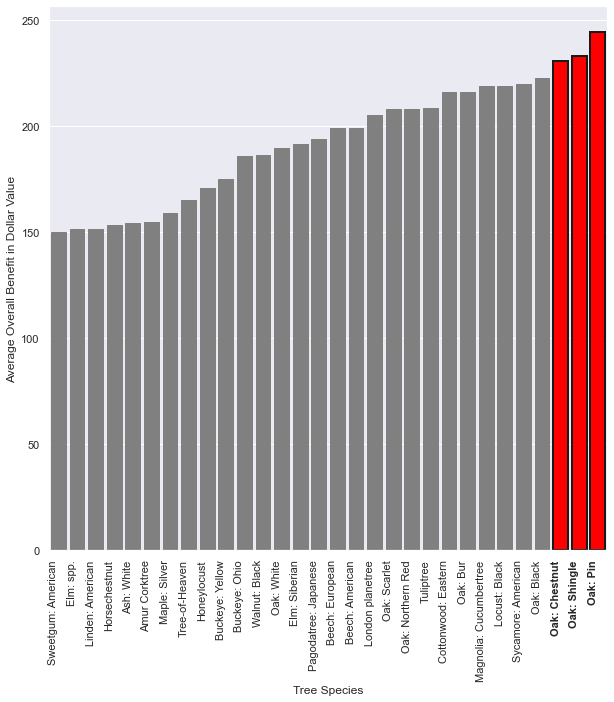

In [381]:
overall_total_benefit_bar_plot = sns.barplot(x=overall_total_benefit["common_name"], y=overall_total_benefit["overall_benefits_dollar_value"]["mean"])
overall_total_benefit_bar_plot.set_xticklabels(overall_total_benefit_bar_plot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
overall_total_benefit_bar_plot.set_xlabel("Tree Species", fontsize = 12)
overall_total_benefit_bar_plot.set_ylabel("Average Overall Benefit in Dollar Value", fontsize = 12)
plt.gcf().set_size_inches(10,10)
for bar in overall_total_benefit_bar_plot.patches:
    if bar.get_height() > 225:
        bar.set_color('red')    
    else:
        bar.set_color('grey')

for i,t in enumerate(overall_total_benefit_bar_plot.get_xticklabels()):
    if t.get_text() in ["Oak: Pin", "Oak: Shingle", "Oak: Chestnut"]:
        ## bold ticklabels
        t.set_weight("bold")
        ## bar edges
        overall_total_benefit_bar_plot.patches[i].set_edgecolor("k")
        overall_total_benefit_bar_plot.patches[i].set_linewidth(2)

Based on the exploration, it seems like different kinds of oak trees offer overall the most benefits. They also offer great benefits in the other categories explored too. Let's compare the different oak species more in-depth.

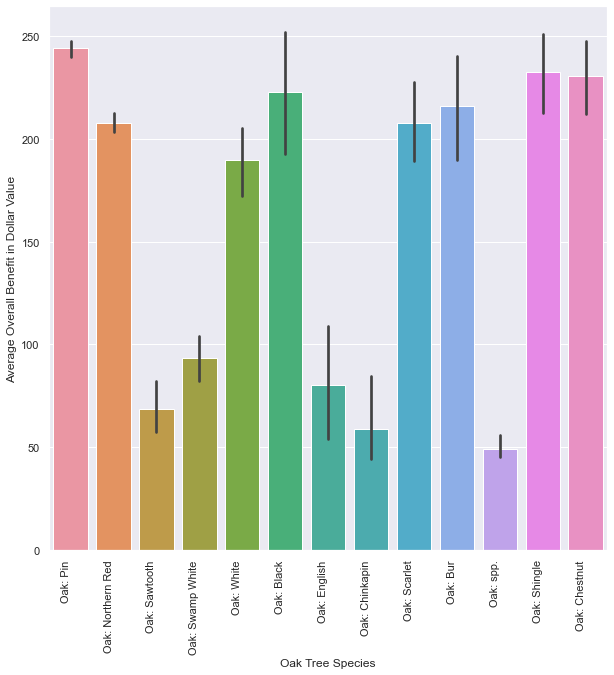

In [363]:
oaks = df_trees[df_trees['common_name'].str.contains('Oak')]

#Again only take oaks species that contains more than 10 data points. 
oaks_count = oaks.groupby("common_name").agg("count").reset_index()
oaks_count = oaks_count[oaks_count["id"] >= 10]
oaks_selected = oaks_count["common_name"].unique()

oaks_to_plot = oaks[oaks.common_name.isin(oaks_selected)]
oaks_bar_plot = sns.barplot(x=oaks_to_plot["common_name"], y=oaks_to_plot["overall_benefits_dollar_value"])
oaks_bar_plot.set_xticklabels(oaks_bar_plot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
oaks_bar_plot.set_xlabel("Oak Tree Species", fontsize = 12)
oaks_bar_plot.set_ylabel("Average Overall Benefit in Dollar Value", fontsize = 12)
plt.gcf().set_size_inches(10,10)

There is big variance in benefits between different oak species. We can build a heatmap to more easily notice the differences.

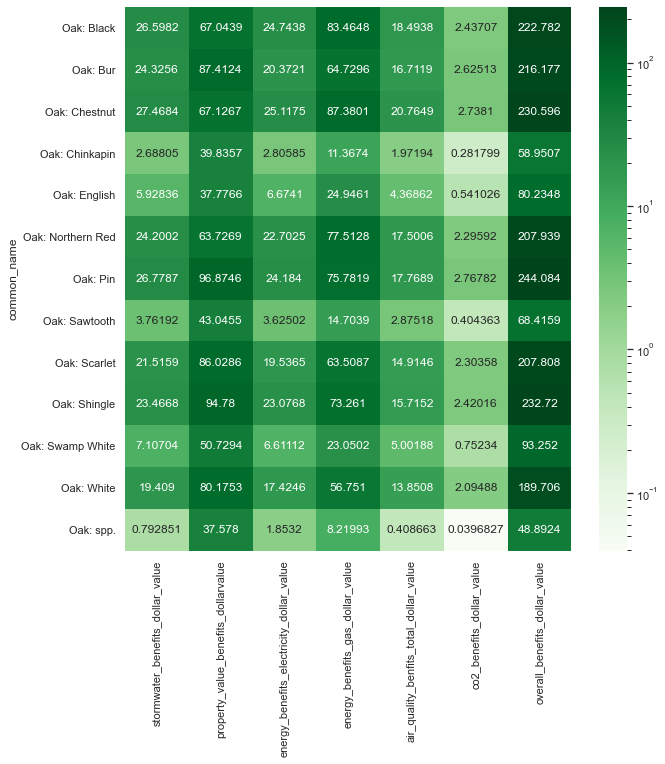

In [364]:
oaks_group = oaks_to_plot.groupby("common_name").agg('mean')
grouped_oaks_plot = sns.heatmap(oaks_group[["stormwater_benefits_dollar_value","property_value_benefits_dollarvalue","energy_benefits_electricity_dollar_value","energy_benefits_gas_dollar_value","air_quality_benfits_total_dollar_value","co2_benefits_dollar_value", "overall_benefits_dollar_value"]], annot= True, fmt='g', xticklabels = True, yticklabels = True, cmap = 'Greens', norm=LogNorm())
plt.gcf().set_size_inches(10,10)

It is clear that some benefits, such as property value benefit, will be dependent on the neighborhood since the property prices can differ drastically. However, now we wonder if a tree will provide different values in different neighborhoods for things that should not be really neighborhood-dependent, such as energy-saving or air quality benefit. To investigate this, I picked the "Oak: Pin" tree as the candidate to graph because this tree species provided overall the most benefit, as shown by explorations done above. 

In [365]:
oak_tree_neighborhood = df_trees[df_trees["common_name"] == "Oak: Pin"]
oak_tree_neighborhood = oak_tree_neighborhood.groupby("neighborhood").agg(["mean", "count"])

oak_tree_neighborhood = oak_tree_neighborhood[oak_tree_neighborhood["id"]["count"] >= 10]
oak_tree_neighborhood = oak_tree_neighborhood.reset_index()

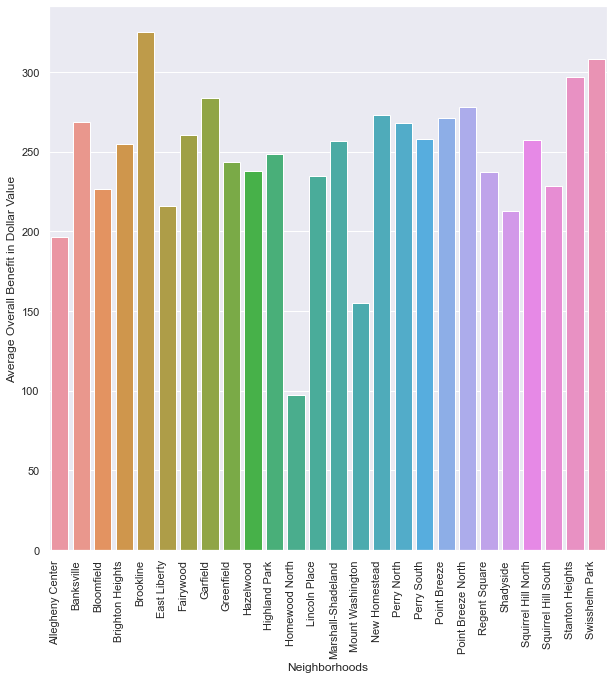

In [366]:
neighborhood_diff_plot = sns.barplot(x=oak_tree_neighborhood["neighborhood"], y=oak_tree_neighborhood["overall_benefits_dollar_value"]["mean"])
neighborhood_diff_plot.set_xticklabels(neighborhood_diff_plot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
neighborhood_diff_plot.set_xlabel("Neighborhoods", fontsize = 12)
neighborhood_diff_plot.set_ylabel("Average Overall Benefit in Dollar Value", fontsize = 12)
plt.gcf().set_size_inches(10,10)

Surprisingly there are big differences between neighborhoods in terms of the overall benefit provided by this tree species. However, this might be purely because of the difference in property benefits, so we need more investigation into some of the sub-categories of overall benefits. 

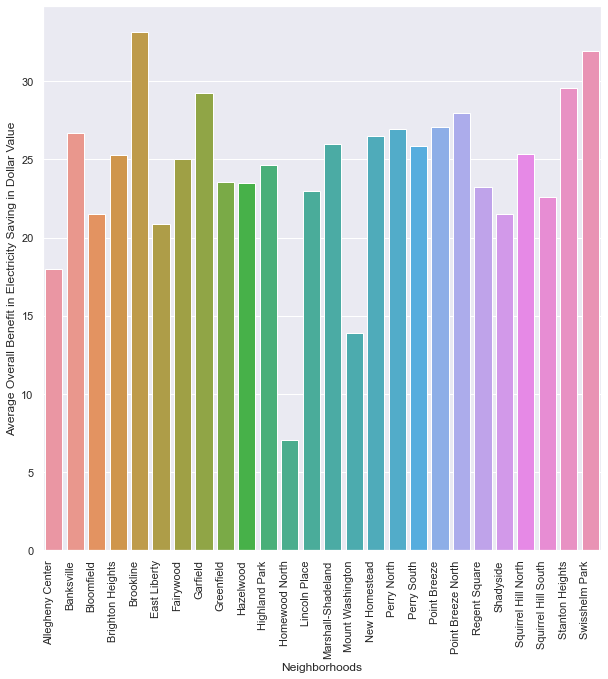

In [367]:
neighborhood_diff_electricity_plot = sns.barplot(x=oak_tree_neighborhood["neighborhood"], y=oak_tree_neighborhood["energy_benefits_electricity_dollar_value"]["mean"])
neighborhood_diff_electricity_plot.set_xticklabels(neighborhood_diff_electricity_plot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
neighborhood_diff_electricity_plot.set_xlabel("Neighborhoods", fontsize = 12)
neighborhood_diff_electricity_plot.set_ylabel("Average Overall Benefit in Electricity Saving in Dollar Value", fontsize = 12)
plt.gcf().set_size_inches(10,10)

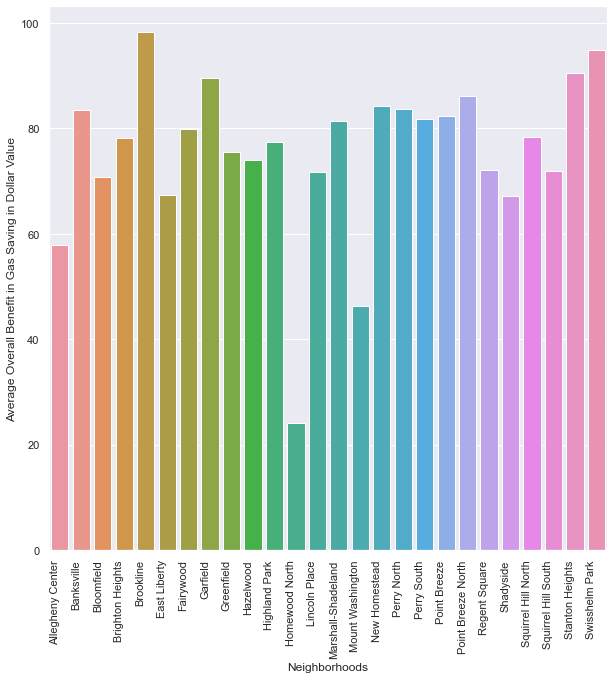

In [368]:
neighborhood_diff_gas_plot = sns.barplot(x=oak_tree_neighborhood["neighborhood"], y=oak_tree_neighborhood["energy_benefits_gas_dollar_value"]["mean"])
neighborhood_diff_gas_plot.set_xticklabels(neighborhood_diff_gas_plot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
neighborhood_diff_gas_plot.set_xlabel("Neighborhoods", fontsize = 12)
neighborhood_diff_gas_plot.set_ylabel("Average Overall Benefit in Gas Saving in Dollar Value", fontsize = 12)
plt.gcf().set_size_inches(10,10)

There are big variance in energy saving benefits acorss neighborhoods as well. 

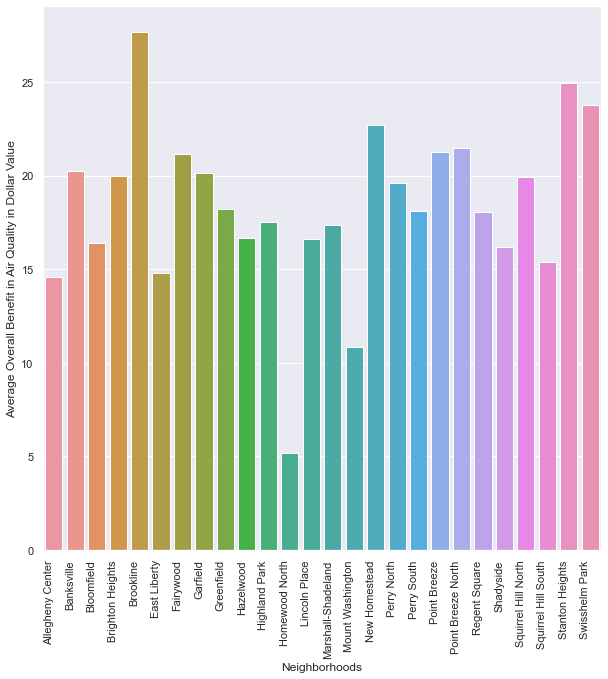

In [369]:
neighborhood_diff_air_q_plot = sns.barplot(x=oak_tree_neighborhood["neighborhood"], y=oak_tree_neighborhood["air_quality_benfits_total_dollar_value"]["mean"])
neighborhood_diff_air_q_plot.set_xticklabels(neighborhood_diff_air_q_plot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
neighborhood_diff_air_q_plot.set_xlabel("Neighborhoods", fontsize = 12)
neighborhood_diff_air_q_plot.set_ylabel("Average Overall Benefit in Air Quality in Dollar Value", fontsize = 12)
plt.gcf().set_size_inches(10,10)

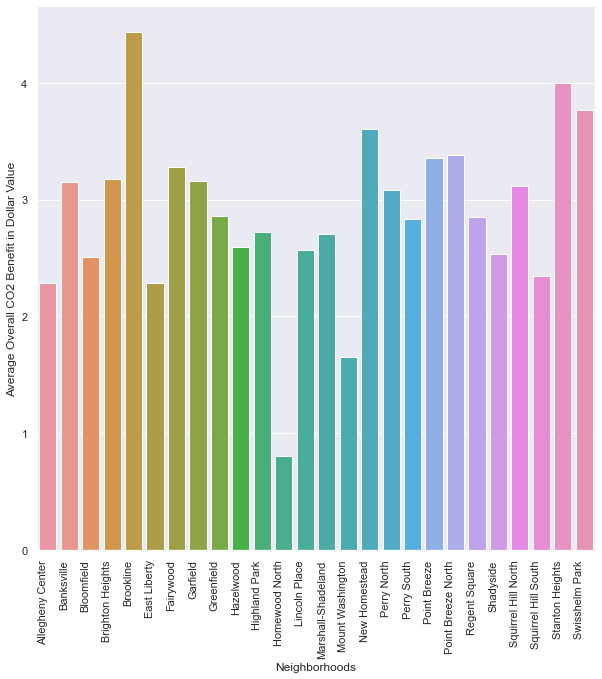

In [370]:
neighborhood_diff_co2_plot = sns.barplot(x=oak_tree_neighborhood["neighborhood"], y=oak_tree_neighborhood["co2_benefits_dollar_value"]["mean"])
neighborhood_diff_co2_plot.set_xticklabels(neighborhood_diff_co2_plot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
neighborhood_diff_co2_plot.set_xlabel("Neighborhoods", fontsize = 12)
neighborhood_diff_co2_plot.set_ylabel("Average Overall CO2 Benefit in Dollar Value", fontsize = 12)
plt.gcf().set_size_inches(10,10)

The most surprising finding is that air quality benefits and co2 benefits which should be the least dependent on neighborhoods also show significant variance across the different neighborhoods. Since all of the neighborhoods are located in Pittsburgh, there should not be a drastic difference in air quality across such a small geographical region over the long term. These two graphs also showed a very similar distribution and a strong correlation. 

All of these graphs combined also indicate that some neighborhoods are consistently receiving fewer benefits compared to others, while some are consistently receiving more benefits. 

## Exploring Trees and Other Neighborhood Factors

In [371]:
complete_data = pd.read_csv("cleaned_data/neighborhood_features_data.csv")

#### Median Home Value

[Text(0.5, 0, 'Median Home Value ($)'),
 Text(0.5, 1.0, 'Distibution of Median Home Value Across Neighborhoods in Pittsburgh')]

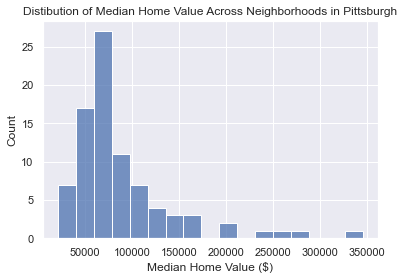

In [372]:
home_value_data = complete_data[['median_home_value', 'area_norm_tree_count', 'area_norm_overall_benefits_dollar_value']]
# remove rows where median_home_value is 0
home_value_data = home_value_data[home_value_data['median_home_value'] != 0]

# plot distribution of median_home_value
plot = sns.histplot(home_value_data['median_home_value'])
plot.set(xlabel = "Median Home Value ($)", title = "Distibution of Median Home Value Across Neighborhoods in Pittsburgh")

[Text(0.5, 0, 'Number of Trees (Normalized by Area)'),
 Text(0, 0.5, 'Median Home Value ($)'),
 Text(0.5, 1.0, 'Relationship between Median Home Value and Number of Trees \nin Neighborhoods across Pittsburgh')]

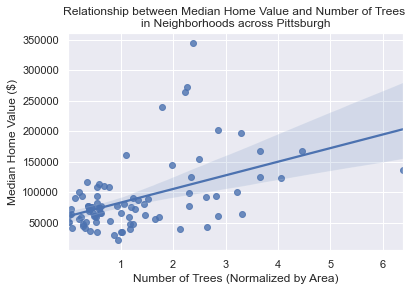

In [373]:
plot = sns.regplot(x = 'area_norm_tree_count', y = 'median_home_value', data = home_value_data)
plot.set(xlabel = "Number of Trees (Normalized by Area)", ylabel = "Median Home Value ($)", 
         title = "Relationship between Median Home Value and Number of Trees \nin Neighborhoods across Pittsburgh")

**Inference:** We observe a slight positive correlation between the median home value and the number of trees. Neighborhoods with higher numbers of trees tend to have higher Median Home Values on an average.

#### Population Density

[Text(0.5, 0, 'Number of Trees (Normalized by Area)'),
 Text(0, 0.5, 'Population Density'),
 Text(0.5, 1.0, 'Population Density vs Number of Trees')]

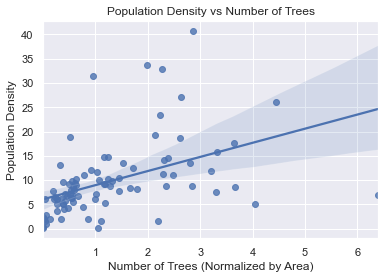

In [374]:
plot = sns.regplot(x = 'area_norm_tree_count', y = 'population_density', data = complete_data)
plot.set(xlabel = "Number of Trees (Normalized by Area)", ylabel = "Population Density",
         title = "Population Density vs Number of Trees")

**Inference:** We also observe a positive correlation between population density and the number of trees, indicating that regions with higher population densities have a larger number of trees per unit area. This seems counter-intuitive given that we would expect areas with larger population densities to have few trees. However, a possible explanation is the presence of regions with sparse vegetation which are not inhabited.

#### Industrial Areas and Trees

[Text(0.5, 0, 'Number of Trees (Normalized by Area)'),
 Text(0, 0.5, 'Percentage Industrial Area'),
 Text(0.5, 1.0, 'Percentage Industrial Area vs Number of Trees')]

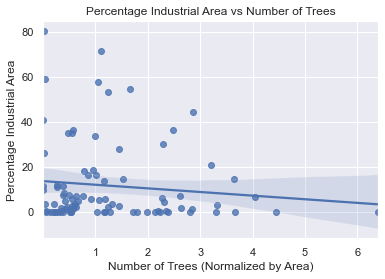

In [375]:
plot = sns.regplot(x = 'area_norm_tree_count', y = 'per_industrial_area', data = complete_data)
plot.set(xlabel = "Number of Trees (Normalized by Area)", ylabel = "Percentage Industrial Area",
         title = "Percentage Industrial Area vs Number of Trees")

**Inference:** In this plot, we do not see any trend between the tree density and the percentage of industrial area. However, we do notice that there are no regions with high industrial areas and high tree densities. This is expected since industrialization often corresponds to cutting down of trees or using barren lands.

#### Commercial Areas and Trees

[Text(0.5, 0, 'Number of Trees (Normalized by Area)'),
 Text(0, 0.5, 'Percentage Commercial Area'),
 Text(0.5, 1.0, 'Percentage Commercial Area vs Number of Trees')]

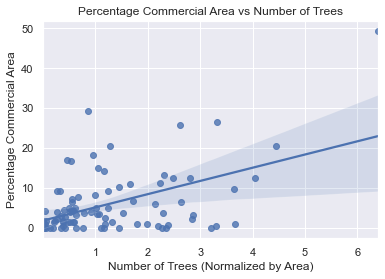

In [376]:
plot = sns.regplot(x = 'area_norm_tree_count', y = 'per_commercial_area', data = complete_data)
plot.set(xlabel = "Number of Trees (Normalized by Area)", ylabel = "Percentage Commercial Area",
         title = "Percentage Commercial Area vs Number of Trees")

**Inference:** Interestingly, we do observe a positive correlation between the percentage of commercial areas in a neighborhood and the tree density.

#### Education and Trees

[Text(0.5, 0, 'Number of Trees (Normalized by Area)'),
 Text(0, 0.5, 'Percentage High School Diplomas'),
 Text(0.5, 1.0, 'Percentage High School Diplomas vs Number of Trees')]

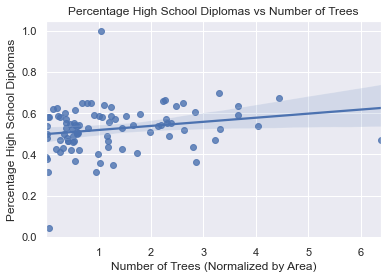

In [377]:
plot = sns.regplot(x = 'area_norm_tree_count', y = 'per_diploma', data = complete_data)
plot.set(xlabel = "Number of Trees (Normalized by Area)", ylabel = "Percentage High School Diplomas",
         title = "Percentage High School Diplomas vs Number of Trees")

**Inference:** We observe no correlation between high school education and tree density.